In [47]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks', context='talk')

import quandl

if int(os.environ.get("MODERN_PANDAS_EPUB", 0)):
    import prep # noqa
    
%matplotlib inline


In [48]:
# Reference: 
# http://tomaugspurger.github.io/modern-7-timeseries
# http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
# https://becominghuman.ai/stats-models-vs-sklearn-for-linear-regression-f19df95ad99b
# https://www.quantopian.com/lectures/linear-regression

In [9]:
aapl = quandl.get("WIKI/AAPL", start_date='2006-01-01', end_date='2010-01-01')
aapl.head().round(2)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-01-03,72.33,74.75,72.25,74.75,28829800.0,0.0,1.0,9.30,9.61,9.29,9.61,201808600.0
2006-01-04,75.13,75.98,74.50,74.97,22128700.0,0.0,1.0,9.66,9.76,9.57,9.63,154900900.0
2006-01-05,74.83,74.90,73.75,74.38,16050800.0,0.0,1.0,9.62,9.63,9.48,9.56,112355600.0
2006-01-06,75.24,76.70,74.55,76.30,25159200.0,0.0,1.0,9.67,9.86,9.58,9.81,176114400.0
2006-01-09,76.73,77.20,75.74,76.05,24108600.0,0.0,1.0,9.86,9.92,9.73,9.77,168760200.0


In [10]:
aapl.index[0]

Timestamp('2006-01-03 00:00:00')

In [11]:
aapl.loc[pd.Timestamp('2006-01-01'):pd.Timestamp('2006-12-31')].head(3)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-01-03,72.332,74.75,72.25,74.75,28829800.0,0.0,1.0,9.295670,9.606417,9.285132,9.606417,201808600.0
2006-01-04,75.130,75.98,74.50,74.97,22128700.0,0.0,1.0,9.655252,9.764489,9.574288,9.634690,154900900.0
2006-01-05,74.830,74.90,73.75,74.38,16050800.0,0.0,1.0,9.616698,9.625694,9.477903,9.558867,112355600.0


In [12]:
# Use partial indexing to accomplish the same.
aapl.loc['2006'].head(3)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-01-03,72.332,74.75,72.25,74.75,28829800.0,0.0,1.0,9.295670,9.606417,9.285132,9.606417,201808600.0
2006-01-04,75.130,75.98,74.50,74.97,22128700.0,0.0,1.0,9.655252,9.764489,9.574288,9.634690,154900900.0
2006-01-05,74.830,74.90,73.75,74.38,16050800.0,0.0,1.0,9.616698,9.625694,9.477903,9.558867,112355600.0


### Resampling

In [13]:
aapl.resample("5d").mean().head(2)

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2006-01-03,74.3830,75.5825,73.7625,75.10000,23042125.0,0.0,1.0,9.559252,9.713405,9.479509,9.651397,161294875.0
2006-01-08,80.4475,82.5725,79.4450,81.27525,51156375.0,0.0,1.0,10.338625,10.611717,10.209790,10.445002,358094625.0


In [14]:
aapl.resample("10d").agg(['mean', 'var']).head(3)

Open                 High                   Low             \
                mean        var      mean        var       mean        var   
Date                                                                         
2006-01-03  77.41525  20.379438  79.07750  21.318136  76.603750  17.450055   
2006-01-13  82.86000   7.014850  83.62800   7.543070  80.978000  13.438370   
2006-01-23  75.18125   5.651184  76.86375   3.917655  73.413737   3.987039   

                Close                 Volume                    ...       \
                 mean        var        mean           var      ...        
Date                                                            ...        
2006-01-03  78.187625  17.403565  37099250.0  4.786190e+14      ...        
2006-01-13  81.582820  15.833293  40308380.0  1.712194e+14      ...        
2006-01-23  74.775000   3.547400  37706037.5  9.210484e+13      ...        

            Adj. Open            Adj. High             Adj. Low            \
                 mean       var       mean       var       mean       var   
Date                                                                        
2006-01-03   9.948939  0.336583  10.162561  0.352087   9.844650  0.288202   
2006-01-13  10.648665  0.115856  10.747364  0.124580  10.406802  0.221946   
2006-01-23   9.661838  0.093334   9.878063  0.064703   9.434688  0.065849   

           Adj. Close            Adj. Volume                
                 mean       var         mean           var  
Date                                                        
2006-01-03  10.048200  0.287434  259694750.0  2.345233e+16  
2006-01-13  10.484529  0.261500  282158660.0  8.389751e+15  
2006-01-23   9.609630  0.058588  263942262.5  4.513137e+15  

[3 rows x 24 columns]

### Rolling

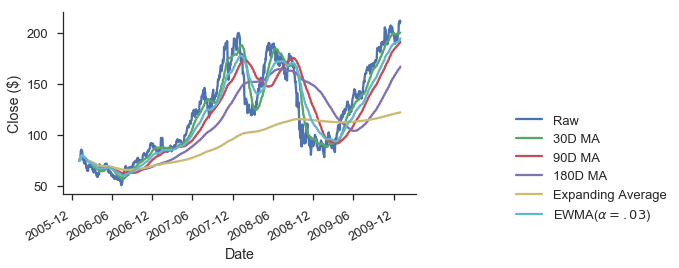

In [15]:
aapl.Close.plot(label='Raw')
aapl.Close.rolling(30).mean().plot(label='30D MA')
aapl.Close.rolling(90).mean().plot(label='90D MA')
aapl.Close.rolling(180).mean().plot(label='180D MA')
aapl.Close.expanding().mean().plot(label='Expanding Average')
aapl.Close.ewm(alpha=0.03).mean().plot(label='EWMA($\\alpha=.03$)')

plt.legend(bbox_to_anchor=(1.25, .5))
plt.tight_layout()
plt.ylabel("Close ($)")
sns.despine()

In [16]:
# Returns a deferred object.
roll = aapl.Close.rolling(30, center=True)
roll


Rolling [window=30,center=True,axis=0]

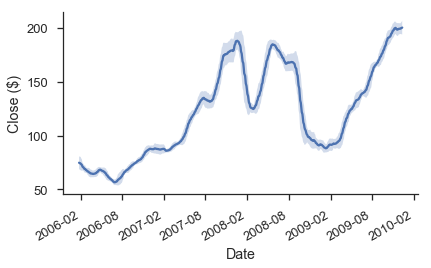

In [17]:
m = roll.agg(['mean', 'std'])
ax = m['mean'].plot()
ax.fill_between(m.index, m['mean'] - m['std'], m['mean'] + m['std'],
                alpha=.25)
plt.tight_layout()
plt.ylabel("Close ($)")
sns.despine()

### Shift

In [18]:
aapl.index

DatetimeIndex(['2006-01-03', '2006-01-04', '2006-01-05', '2006-01-06',
               '2006-01-09', '2006-01-10', '2006-01-11', '2006-01-12',
               '2006-01-13', '2006-01-17',
               ...
               '2009-12-17', '2009-12-18', '2009-12-21', '2009-12-22',
               '2009-12-23', '2009-12-24', '2009-12-28', '2009-12-29',
               '2009-12-30', '2009-12-31'],
              dtype='datetime64[ns]', name='Date', length=1007, freq=None)

In [19]:
aapl.index + pd.DateOffset(months=3, days=-2) # Offset by 3months minus 2 days

DatetimeIndex(['2006-04-01', '2006-04-02', '2006-04-03', '2006-04-04',
               '2006-04-07', '2006-04-08', '2006-04-09', '2006-04-10',
               '2006-04-11', '2006-04-15',
               ...
               '2010-03-15', '2010-03-16', '2010-03-19', '2010-03-20',
               '2010-03-21', '2010-03-22', '2010-03-26', '2010-03-27',
               '2010-03-28', '2010-03-29'],
              dtype='datetime64[ns]', name='Date', length=1007, freq=None)

### Holidays

In [21]:
from pandas.tseries.holiday import USColumbusDay

In [22]:
USColumbusDay.dates('2015-01-01', '2020-01-01')

DatetimeIndex(['2015-10-12', '2016-10-10', '2017-10-09', '2018-10-08',
               '2019-10-14'],
              dtype='datetime64[ns]', freq='WOM-2MON')

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.externals import joblib
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import svm

import numpy as np

In [33]:
y = aapl['Adj. Close']

In [34]:
# Create new data set...each lable 
X = (pd.concat([y.shift(i) for i in range(6)], axis=1,
               keys=['y'] + ['L%s' % i for i in range(1, 6)])
       .dropna())
y = X.pop('y')
print(X.shape)
print(y.shape)
X.head()

(1002, 5)
(1002,)


,L1,L2,L3,L4,L5
Date,,,,,
2006-01-10,9.773485,9.805613,9.558867,9.634690,9.606417
2006-01-11,10.391637,9.773485,9.805613,9.558867,9.634690
2006-01-12,10.782319,10.391637,9.773485,9.805613,9.558867
2006-01-13,10.832568,10.782319,10.391637,9.773485,9.805613
2006-01-17,10.999495,10.832568,10.782319,10.391637,9.773485


In [35]:
regr = LinearRegression()

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
regr.fit(X_train,y_train)
print("Intercept: {}, Coefficient: {}".format(regr.intercept_, regr.coef_))

Intercept: 0.007456936377266743, Coefficient: [ 0.96587182 -0.03437684  0.0643042   0.07502318 -0.07026481]


In [37]:
y_predict = regr.predict(X_test)

In [38]:
rmse = lambda y, y_: np.sqrt(np.mean((y-y_)**2))
# The results evaluated by RMSE is quite poor.
rmse(y_predict, y_test)

0.43060428141520019

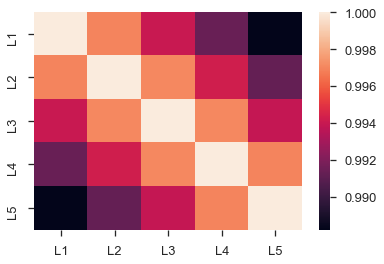

In [39]:
# Features are highly correlated as one would expect.
# The independent variables having a linear relationship is characterized by multicollinearity
sns.heatmap(X_train.corr());


In [40]:
from statsmodels import regression
import statsmodels.api as sm

/usr/local/lib/python3.5/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [46]:
X_train = sm.add_constant(X_train)
sm_regr = sm.OLS(y_train,X_train).fit()
sm_regr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 2.805e+04
Date:                Fri, 15 Dec 2017   Prob (F-statistic):               0.00
Time:                        01:34:21   Log-Likelihood:                -452.36
No. Observations:                 801   AIC:                             916.7
Df Residuals:                     795   BIC:                             944.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0075      0.045      0.167      0.868      -0.080       0.095
L1             0.9659      0.034     28.147      0.000       0.899       1.033
L2            -0.0344      0.049     -0.704      0.482      -0.130       0.061
L3             0.0643      0.049      1.314      0.189      -0.032       0.160
L4             0.0750      0.050      1.508      0.132      -0.023       0.173
L5            -0.0703      0.034     -2.037      0.042      -0.138      -0.003
==============================================================================
Omnibus:                      133.748   Durbin-Watson:                   2.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              731.970
Skew:                          -0.627   Prob(JB):                    1.13e-159
Kurtosis:                       7.512   Cond. No.                         165.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""